In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob
from zimp.readability.lively import VocabularySizeScore, OutOfVocabularySizeScore, LivelyScore
from zimp.readability.vocab import build_word_vocab

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'german'
    return 'english'

def get_train_texts(ds_path, dataset):
    if '_train' in ds_path:
        return dataset.text
    ds_path = ds_path.replace('_test', '_train')
    return pd.read_csv(ds_path).text

score_builders = {
    'vocab_size': lambda lang, train_texts: VocabularySizeScore(language=lang),
    'oov_default_size': lambda lang, train_texts: OutOfVocabularySizeScore(language=lang),
    'oov_train_size': lambda lang, train_texts: OutOfVocabularySizeScore(word_list=build_word_vocab(train_texts, max_n=10000), language=lang),
    'lively_default_score': lambda lang, train_texts: LivelyScore(max_n=10000, language=lang),
    'lively_train_score': lambda lang, train_texts: LivelyScore(max_n=10000, language=lang, reference_texts=train_texts)
}

#score_builders = {
#    'oov_train_size_1000': lambda lang, train_texts: OutOfVocabularySizeScore(word_list=build_word_vocab(train_texts, max_n=1000), language=lang),
#    'lively_train_score_1000': lambda lang, train_texts: LivelyScore(max_n=1000, language=lang, reference_texts=train_texts)
#}

source_dir = '../../zimp_orchestrator/orch/resources'
rs = []
df_confs = {}
for file in glob('confidence/confidence*.csv'):
    dataset =  file.split('_')[-2]
    train_test = file.split('_')[-1].split('.')[0]
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_conf = pd.read_csv(file)
    df_text = pd.read_csv(source_file)
    train_texts = get_train_texts(source_file, df_text)
    lang = get_ds_language(file.split('_')[-2])
    for score in score_builders:
        print(f'Analyzing {file} for score {score}')
        file_path = f'lively/{score}_{"_".join(file.split("_")[-2:])}'
        if os.path.exists(file_path):
            df_conf[score] = pd.read_csv(file_path)
        else:
            df_conf[score] = score_builders[score](lang, train_texts).get_scores(df_text.text)
            df_conf[score].to_csv(file_path, index=False)
        rs.append({
            'pearson_p_true': scipy.stats.pearsonr(df_conf['p_true'], df_conf[score])[0],
            'spearman_p_true': scipy.stats.spearmanr(df_conf['p_true'], df_conf[score])[0],
            'pearson_conf': scipy.stats.pearsonr(df_conf['mean'], df_conf[score])[0],
            'spearman_conf': scipy.stats.spearmanr(df_conf['mean'], df_conf[score])[0],
            'model': '_'.join(file.split('_')[1:-2]),
            'dataset': dataset,
            'train_test': train_test,
            'language': lang,
            'score': score
        })
    
        df_confs[score + '_' + '_'.join(file.split('_')[1:])[:-4]] = df_conf
    
df_corr = pd.DataFrame(rs)
df_corr

Analyzing confidence\confidence_BERT_DBP-14_test.csv for score vocab_size
Analyzing confidence\confidence_BERT_DBP-14_test.csv for score oov_default_size
Analyzing confidence\confidence_BERT_DBP-14_test.csv for score oov_train_size
Analyzing confidence\confidence_BERT_DBP-14_test.csv for score lively_default_score
Analyzing confidence\confidence_BERT_DBP-14_test.csv for score lively_train_score
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score vocab_size
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score oov_default_size
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score oov_train_size
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score lively_default_score
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score lively_train_score
Analyzing confidence\confidence_BERT_TREC-6_test.csv for score vocab_size
Analyzing confidence\confidence_BERT_TREC-6_test.csv for score oov_default_size
Analyzing confidence\confidence_BERT_TREC-6_t

E:\Python\miniconda3\envs\zimp\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
E:\Python\miniconda3\envs\zimp\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Analyzing confidence\confidence_BERT_YELP-5_test.csv for score vocab_size
Analyzing confidence\confidence_BERT_YELP-5_test.csv for score oov_default_size
Analyzing confidence\confidence_BERT_YELP-5_test.csv for score oov_train_size
Analyzing confidence\confidence_BERT_YELP-5_test.csv for score lively_default_score
Analyzing confidence\confidence_BERT_YELP-5_test.csv for score lively_train_score
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score vocab_size
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score oov_default_size
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score oov_train_size
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score lively_default_score
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score lively_train_score
Analyzing confidence\confidence_DECISION_TREE_10K-GNAD_test.csv for score vocab_size
Analyzing confidence\confidence_DECISION_TREE_10K-GNAD_test.csv for score oov_default_size
Analyzing confidence\co

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language,score
0,-0.030739,-0.032261,-0.060303,-0.113660,BERT,DBP-14,test,english,vocab_size
1,-0.008723,-0.008865,-0.027122,-0.058045,BERT,DBP-14,test,english,oov_default_size
2,-0.017336,-0.016366,-0.051013,-0.069254,BERT,DBP-14,test,english,oov_train_size
3,-0.038085,-0.040200,-0.063932,-0.126418,BERT,DBP-14,test,english,lively_default_score
4,0.002940,0.000406,0.017397,-0.000307,BERT,DBP-14,test,english,lively_train_score
...,...,...,...,...,...,...,...,...,...
295,-0.010071,-0.021294,-0.017460,-0.024625,SVM,YELP-5,train,english,vocab_size
296,-0.019609,-0.032564,-0.027323,-0.037543,SVM,YELP-5,train,english,oov_default_size
297,-0.036006,-0.047357,-0.045351,-0.050918,SVM,YELP-5,train,english,oov_train_size
298,0.054150,0.046711,0.037653,0.043955,SVM,YELP-5,train,english,lively_default_score


In [3]:
df_corr.score.value_counts()

vocab_size              60
oov_default_size        60
oov_train_size          60
lively_default_score    60
lively_train_score      60
Name: score, dtype: int64

In [4]:
for score in df_corr.score.unique():
    print(score)
    print(df_corr[df_corr.score == score][['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean())
    print('-'*20)

vocab_size
pearson_p_true    -0.012434
spearman_p_true   -0.013046
pearson_conf      -0.033179
spearman_conf     -0.073976
dtype: float64
--------------------
oov_default_size
pearson_p_true    -0.002984
spearman_p_true   -0.002382
pearson_conf      -0.004896
spearman_conf     -0.051984
dtype: float64
--------------------
oov_train_size
pearson_p_true    -0.014446
spearman_p_true   -0.013648
pearson_conf      -0.042730
spearman_conf     -0.074818
dtype: float64
--------------------
lively_default_score
pearson_p_true    -0.005035
spearman_p_true   -0.004769
pearson_conf      -0.009487
spearman_conf     -0.017125
dtype: float64
--------------------
lively_train_score
pearson_p_true     0.007871
spearman_p_true    0.007749
pearson_conf       0.049850
spearman_conf      0.047676
dtype: float64
--------------------


In [5]:
for score in df_corr.score.unique():
    df_sc = df_corr[df_corr.score == score]
    df_model_corr = df_sc.groupby(['model'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
    print(score)
    print(df_model_corr)
    print('-'*20)

vocab_size
               pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
model                                                                      
BERT                -0.049929        -0.054448     -0.081653      -0.104154
DECISION_TREE       -0.031808        -0.035767     -0.001006       0.001343
FASTTEXT            -0.060594        -0.064151     -0.246668      -0.322608
GERMAN_BERT          0.022518         0.031271      0.052792       0.055298
RANDOM_FOREST        0.041191         0.039685      0.189638       0.115945
SVM                  0.002747         0.006590     -0.093427      -0.140134
--------------------
oov_default_size
               pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
model                                                                      
BERT                -0.029649        -0.023275     -0.066115      -0.091811
DECISION_TREE       -0.012315        -0.016855      0.021836       0.029888
FASTTEXT            -0.039686        -0

In [6]:
for score in df_corr.score.unique():
    df_sc = df_corr[df_corr.score == score]
    df_model_corr = df_sc.groupby(['train_test'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
    print(score)
    print(df_model_corr)
    print('-'*20)

vocab_size
            pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
train_test                                                              
test             -0.010475        -0.013629     -0.042411      -0.078962
train            -0.014393        -0.012464     -0.023946      -0.068990
--------------------
oov_default_size
            pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
train_test                                                              
test              0.001080         0.004063     -0.011320      -0.044758
train            -0.007049        -0.008826      0.001528      -0.059211
--------------------
oov_train_size
            pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
train_test                                                              
test             -0.006919        -0.005667     -0.037489      -0.068744
train            -0.021973        -0.021630     -0.047972      -0.080892
--------------------
lively_default_sco

In [7]:
def get_latex_method_name(model_type):
    if model_type == 'GERMAN_BERT':
        return 'GER\_BERT'
    elif model_type == 'DECISION_TREE':
        return 'DT'
    elif model_type == 'RANDOM_FOREST':
        return 'RF'
    elif model_type == 'FASTTEXT':
        return 'FT'
    elif model_type == 'DUMMY':
        return 'BASE'
    return model_type.replace('_', '\_')

def get_latex_metric(metric_str, max_abs_score, method):
    is_max = np.abs(metric_str) == max_abs_score
    
    metric_str = np.round(metric_str,3)
    if is_max:
        return '\mathbf{' + str(metric_str) + '}'
    return metric_str

In [8]:
reported_methods = ['DUMMY', 'DECISION_TREE', 'RANDOM_FOREST', 'SVM', 'FASTTEXT', 'BERT', 'GERMAN_BERT']
print("""
\\begin{table}[]
    \small
    \centering
    \\begin{tabular}{l|cc|cc|cc|cc}
        Method & $\\rho_1$ & $\\rho'_1$ & $\\rho_2$ & $\\rho'_2$ & $\\rho_3$ & $\\rho'_3$ & $\\rho_4$ & $\\rho'_4$ \\\\ \hline
""")

for method in reported_methods:
    if method not in df_corr.model.values:
        continue
    s = ' ' * 8
    s += '\\textit{' + get_latex_method_name(method) + '}'
    for score in ['vocab_size', 'oov_default_size', 'oov_train_size', 'lively_train_score']:
        s += ' & '
        df_model_means = df_corr[(df_corr.score==score)].groupby('model').mean()
        df_c = df_corr[(df_corr.score==score) & (df_corr.model==method)]
        s += ' & '.join([f'${get_latex_metric(df_c[metric].mean() , df_model_means[metric].abs().max(), method)}$' for metric in ['spearman_p_true', 'spearman_conf']])
    s +=  ' \\\\'
    print(s)

print("""
    \end{tabular}
    \caption[Correlation between different lively scores and classification metrics]{Spearman correlation coefficients for lively scores and the ratio of correct model instances $(\\rho)$, and the average prediction confidence $(\\rho')$. 
    The index number indicates the used lively score: (1) vocabulary size, (2) out-of-vocabulary size with default word list, (3) out-of-vocabulary size with training set word list, (4) lively score with training set word list}
    \label{tab:corr_lively}
\end{table}
""")


\begin{table}[]
    \small
    \centering
    \begin{tabular}{l|cc|cc|cc|cc}
        Method & $\rho_1$ & $\rho'_1$ & $\rho_2$ & $\rho'_2$ & $\rho_3$ & $\rho'_3$ & $\rho_4$ & $\rho'_4$ \\ \hline

        \textit{DT} & $-0.036$ & $0.001$ & $-0.017$ & $0.03$ & $-0.018$ & $-0.01$ & $0.011$ & $0.081$ \\
        \textit{RF} & $0.04$ & $0.116$ & $0.039$ & $0.081$ & $0.007$ & $0.011$ & $\mathbf{0.014}$ & $0.094$ \\
        \textit{SVM} & $0.007$ & $-0.14$ & $0.009$ & $-0.097$ & $-0.008$ & $-0.054$ & $0.014$ & $-0.035$ \\
        \textit{FT} & $\mathbf{-0.064}$ & $\mathbf{-0.323}$ & $\mathbf{-0.044}$ & $\mathbf{-0.251}$ & $\mathbf{-0.042}$ & $\mathbf{-0.261}$ & $0.0$ & $0.073$ \\
        \textit{BERT} & $-0.054$ & $-0.104$ & $-0.023$ & $-0.092$ & $-0.037$ & $-0.137$ & $0.008$ & $0.03$ \\
        \textit{GER\_BERT} & $0.031$ & $0.055$ & $0.024$ & $0.047$ & $0.011$ & $-0.008$ & $-0.011$ & $0.019$ \\

    \end{tabular}
    \caption[Correlation between different lively scores and classification me

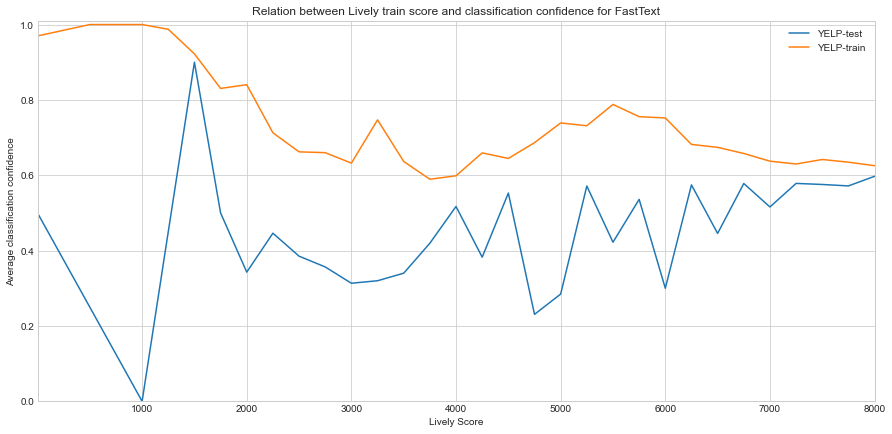

In [59]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

score = 'lively_train_score'
bucket_size=250
ds_keys = [ds for ds in df_confs if f'{score}_FASTTEXT_YELP-5' in ds]
trace_names = []
for ds in ds_keys:
    df_confs[ds][score+'_bucket'] = df_confs[ds][score].apply(lambda x: bucket_size* round(x/bucket_size))
    df_confs[ds].groupby([score+'_bucket'])['p_true'].mean().plot(ax=ax, xlim=(1,8000), ylim=(0,1.01))
    trace_names.append(ds)
    
plt.title('Relation between Lively train score and classification confidence for FastText')
plt.xlabel('Lively Score')
plt.ylabel('Average classification confidence')
#ax.legend(trace_names)
ax.legend(['YELP-test', 'YELP-train'])
plt.savefig(f'confidence/011_corr_lively_yelp.pdf')
plt.show()

In [13]:
df_corr[(df_corr.score=='oov_train_size') & (df_corr.train_test=='test')].sort_values(by='spearman_p_true').head(n=30)

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language,score
92,-0.079727,-0.127173,-0.289423,-0.372536,FASTTEXT,10K-GNAD,test,german,oov_train_size
272,-0.073554,-0.080498,-0.070463,-0.094214,SVM,GERMEVAL-2020,test,german,oov_train_size
122,-0.061931,-0.068086,-0.137302,-0.134471,FASTTEXT,GERMEVAL-2020,test,german,oov_train_size
182,-0.028048,-0.054460,-0.033897,-0.118283,RANDOM_FOREST,10K-GNAD,test,german,oov_train_size
42,-0.049299,-0.043109,-0.043137,-0.038828,DECISION_TREE,DBP-14,test,english,oov_train_size
292,-0.033445,-0.035369,-0.036767,-0.039152,SVM,YELP-5,test,english,oov_train_size
82,-0.032643,-0.030305,-0.020077,-0.022183,DECISION_TREE,YELP-5,test,english,oov_train_size
22,-0.034714,-0.028402,-0.140045,-0.186010,BERT,YELP-5,test,english,oov_train_size
252,-0.032668,-0.027687,-0.079309,-0.136794,SVM,DBP-14,test,english,oov_train_size
62,-0.021508,-0.026578,-0.054474,-0.028089,DECISION_TREE,GERMEVAL-2020,test,german,oov_train_size


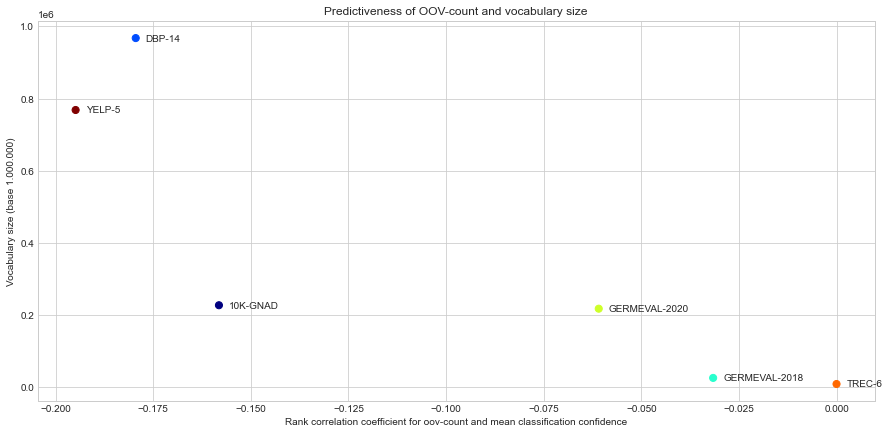

In [50]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

colors=plt.cm.jet(np.linspace(0, 1, len(df_means.index)))
df_ca = df_corr[(df_corr.model != 'RANDOM_FOREST') & (df_corr.model != 'DECISION_TREE') & (df_corr.score == 'oov_train_size')]
df_means = pd.DataFrame(df_ca.groupby(['dataset'])['spearman_conf'].mean().fillna(0))
df_means['vocab_size'] = pd.Series({'10K-GNAD': 227275, 'DBP-14': 967723, 'GERMEVAL-2018': 25822, 'GERMEVAL-2020': 217703, 'TREC-6': 8965, 'YELP-5': 768397})
df_means.plot(ax=ax, kind='scatter', x='spearman_conf', y='vocab_size', s=50, c=colors)

plt.title('Predictiveness of OOV-count and vocabulary size')
plt.xlabel('Rank correlation coefficient for oov-count and mean classification confidence')
plt.ylabel('Vocabulary size (base 1.000.000)')

for k, v in df_means.iterrows():
    ax.annotate(k, v, xytext=(10,-3), textcoords='offset points')
    
plt.savefig(f'confidence/011_corr_oov_train_vocab.pdf')
plt.show()